# 초기 설정

In [1]:
batch_size = 50
one_looptime = int(55000/batch_size)
learning_rate = 0.01

name = 'std3_batch50_lr001'
save_path = '/data/lc_'

In [2]:
learn_count = one_looptime*100

# setting

In [3]:
# 패키지 import
import tensorflow as tf
import time
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 4.0)
plt.rcParams['image.cmap'] = 'Greys'

import numpy as np
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)

Instructions for updating:
Use the retry module or similar alternatives.


In [4]:
# data 불러오기
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


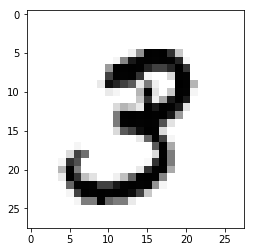

In [5]:
# data 확인하기
print (mnist.train.images.shape)
print (mnist.train.labels.shape)

print (mnist.test.images.shape)
print (mnist.test.labels.shape)

idx = 1
example_image = mnist.train.images[idx]
example_image_reshaped = example_image.reshape((28, 28)) # Can't render a line of 784 numbers
#len(example_image_reshaped.reshape((28*28)))
example_label = mnist.train.labels[idx]
print(example_label)
plt.imshow(example_image_reshaped)

In [6]:
# 변수 생성
img_size = 28
img_size_2 = img_size*img_size

params = ['W_fc', 'b_fc', 'W_fc_ing', 'b_fc_ing', 'W_fc0', 'b_fc0', 'error']
data_params = {'W_fc' : 2*np.random.rand(img_size_2,10) - 1,
               'b_fc' : 2*np.random.rand(1,10) - 1,
               'W_fc_ing' : [],
               'b_fc_ing' : [],
               'error' : []}

W_fc_ing = []
b_fc_ing = []


# 에러 list 생성 
error_list = []

datasize = len(mnist.train.labels)

# 불러오기(선택 사항)

# 데이터를 불러올 때만 사용
params = ['W_fc', 'b_fc', 'W_fc_ing', 'b_fc_ing', 'error']
data_params = {}

for i in range(len(params)):
    data_params.update({params[i]: 
                        np.load(save_path+ name +'_' + params[i] + '.npy')})

# list로 바꾸기
data_params['error'] = list(data_params['error'])
W_fc_ing = []
b_fc_ing = []

for i in range(len(data_params['W_fc_ing'])):
    W_fc_ing.append(data_params['W_fc_ing'][i])
    b_fc_ing.append(data_params['b_fc_ing'][i])

data_params['W_fc_ing'] = W_fc_ing
data_params['b_fc_ing'] = b_fc_ing

# 학습

In [8]:
# 학습 
start = time.time()
for n in range(learn_count):
    nn = batch_size * n
    error = 0
    accuracy = 0
    del_W_fc = np.zeros(data_params['W_fc'].shape)
    del_b_fc = np.zeros(data_params['b_fc'].shape)
    
    for q in range(batch_size):
        q = (q+nn) % datasize
        X_input = mnist.train.images[q].reshape(1,img_size_2)
        X_teach = mnist.train.labels[q].reshape(data_params['b_fc'].shape)
        
        # Input -> output
        X_output = np.matmul(X_input, data_params['W_fc']) + data_params['b_fc']
        X_sigmoid = 1/(np.exp(-X_output) + 1)
        
        # output -> input
        accuracy += np.argmax(X_sigmoid) == np.argmax(X_teach)
        
        del_error = (X_sigmoid - X_teach)
        error += 0.5*np.sum(del_error*del_error)
        
        del_output = del_error*(X_sigmoid*(1-X_sigmoid))
        del_W_fc += np.transpose(X_input) * del_output
        del_b_fc += del_output
        
    data_params['W_fc'] -= learning_rate * del_W_fc/batch_size
    data_params['b_fc'] -= learning_rate * del_output/batch_size
        
    error = error/batch_size
    data_params['error'].append(error)
    
    if n%one_looptime == 0:
        data_params['W_fc_ing'].append(data_params['W_fc']*1)
        data_params['b_fc_ing'].append(data_params['b_fc']*1)
        print("loop {0:4d}\t Error : {1:.3f}\t accuracy : {2:.3f}".format(n//one_looptime + 1, error, accuracy/batch_size))
        
    time.sleep(0.001)
    
tt = time.time() - start
print("{0:.0f}분 {1:.0f}초".format(tt//60, tt%60))

loop    1	 Error : 0.136	 accuracy : 0.780
loop    2	 Error : 0.136	 accuracy : 0.780
loop    3	 Error : 0.136	 accuracy : 0.780
loop    4	 Error : 0.136	 accuracy : 0.780
loop    5	 Error : 0.136	 accuracy : 0.780
loop    6	 Error : 0.136	 accuracy : 0.780
loop    7	 Error : 0.136	 accuracy : 0.780
loop    8	 Error : 0.136	 accuracy : 0.780
loop    9	 Error : 0.136	 accuracy : 0.780
loop   10	 Error : 0.136	 accuracy : 0.780
loop   11	 Error : 0.136	 accuracy : 0.780
loop   12	 Error : 0.136	 accuracy : 0.780
loop   13	 Error : 0.136	 accuracy : 0.780
loop   14	 Error : 0.136	 accuracy : 0.780
loop   15	 Error : 0.136	 accuracy : 0.780
loop   16	 Error : 0.136	 accuracy : 0.780
loop   17	 Error : 0.136	 accuracy : 0.780
loop   18	 Error : 0.136	 accuracy : 0.780
loop   19	 Error : 0.136	 accuracy : 0.780
loop   20	 Error : 0.136	 accuracy : 0.780
loop   21	 Error : 0.136	 accuracy : 0.780
loop   22	 Error : 0.136	 accuracy : 0.780
loop   23	 Error : 0.136	 accuracy : 0.780
loop   24	 

In [9]:
# 데이터 저장
# list도 자동으로 array 저장됨
for ii in data_params.keys():
    np.save(save_path+ name +'_' + ii + '.npy', data_params[ii])


# error 출력

Text(0,0.5,'error')

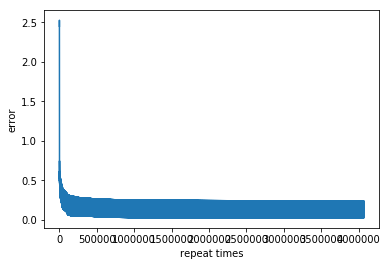

In [10]:
# error 출력
# plt.ylim(ymin=0, ymax=1)
plt.plot(data_params['error'])
plt.xlabel('repeat times')
plt.ylabel('error')

In [11]:
len(data_params['error'])

4070000

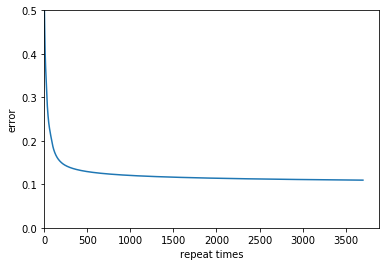

In [12]:
# 평균 취해서 plot
# 전체 plot
part = one_looptime

error_list = np.array(data_params['error'])
error_list_part = []
for ip in range(int(len(data_params['error'])/part)):
    error_list_part.append(np.average(data_params['error'][ip*part : (ip+1)*part]))
    
plt.plot(error_list_part)
plt.xlim(xmin=0)
plt.ylim(ymin=0, ymax=0.5)
plt.xlabel('repeat times')
plt.ylabel('error')

error_list = list(error_list)

# accuracy check

In [13]:
# test. accuracy check
accuracy_calc = np.zeros((len(mnist.test.images)))
test_num = 10000
not_correct = []
correct = []
for q in range(test_num):
    #q=101
    X_input = mnist.test.images[q].reshape(1,img_size_2)
    X_teach = mnist.test.labels[q].reshape(data_params['b_fc'].shape)

    # Input -> output
    X_output = np.matmul(X_input, data_params['W_fc']) + data_params['b_fc']
    X_sigmoid = 1/(np.exp(-X_output) + 1)
    
    corr = np.argmax(X_sigmoid) == np.argmax(X_teach)
    accuracy_calc[q] = corr
    if corr:
        correct.append(q)
    else:
        not_correct.append(q)
        
accuracy = np.average(accuracy_calc[0:test_num])
print(accuracy)

0.8396


In [14]:
# accuracy ing
ing_accuracy_list = []
ing_not_correct_idx = []

try:
    ing_accuracy_list = np.load(save_path + name +'_ing_accuracy_list.npy')
    ing_not_correct_idx1 = np.load(save_path + name +'_ing_not_correct_idx.npy')
    
    ing_accuracy_list = list(ing_accuracy_list)
    for i in range(len(ing_not_correct_idx1)):
        ing_not_correct_idx.append([])
        ing_not_correct_idx[i] = ing_not_correct_idx1[i]
        
    print('try')
    
except:
    ing_accuracy_list = []
    ing_not_correct_idx = []
    print('except')

try


In [15]:
# test. accuracy check
accuracy_calc = np.zeros((len(mnist.test.images)))
accum_num = len(ing_accuracy_list)
   
start = time.time()
for ii in range(len(data_params['W_fc_ing']) - accum_num):
    ii += accum_num
    ing_not_correct_idx.append([])
    
    for q in range(len(accuracy_calc)):
        X_input = mnist.test.images[q].reshape(1,img_size_2)
        X_teach = mnist.test.labels[q].reshape(data_params['b_fc'].shape)
        
        # Input -> output
        X_output = np.matmul(X_input, data_params['W_fc_ing'][ii]) + data_params['b_fc_ing'][ii]
        X_sigmoid = 1/(np.exp(-X_output) + 1)

        corr = np.argmax(X_sigmoid) == np.argmax(X_teach)
        accuracy_calc[q] = corr
        
        if not corr:
            ing_not_correct_idx[ii].append(q)

    accuracy = np.average(accuracy_calc)
    ing_accuracy_list.append(accuracy)
    
    if ii%100==0:
        tt = time.time() - start
        print("{0:.0f}분 {1:.0f}초\taccuracy : {2:.4f}".format(tt//60, tt%60, accuracy))

np.save(save_path + name +'_ing_accuracy_list.npy', ing_accuracy_list)
np.save(save_path + name +'_ing_not_correct_idx.npy', ing_not_correct_idx)

tt = time.time() - start
print("{0:.0f}분 {1:.0f}초".format(tt//60, tt%60))
print('complete')

0분 0초	accuracy : 0.8396
0분 13초
complete


In [16]:
len(ing_accuracy_list)

3700